### Building dataset that pairs CVD clinScores table data with images

In [26]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# paths to files
table_filehandle = "/home/s2208943/ipdis/data/preprocessed_data/Ed_CVD_tabledata/CVD_clinScores_dataset.csv"

In [4]:
df = pd.read_csv(table_filehandle)

In [49]:
#df

In [7]:
# load in the two datasets and check that the images for each domain appear in the same order.
# if so I can extract the order from the MRISegmentation3D dataset dataframe
from twaidata.torchdatasets.whole_brain_dataset import MRISegmentationDatasetFromFile
from twaidata.torchdatasets.in_ram_ds import MRISegmentation3DDataset

In [11]:
In_disk_dir = '/home/s2208943/ipdis/data/preprocessed_data/EdData/domainA'
in_disk_ds = MRISegmentationDatasetFromFile(In_disk_dir, 
                 img_filetypes=["FLAIR_BET_mask.nii.gz", "FLAIR.nii.gz", "T1.nii.gz"], # brain mask, flair, T1.
                 label_filetype="wmh.nii.gz")

In [14]:
in_ram_dir = '/home/s2208943/ipdis/data/preprocessed_data/collated/EdData/'
in_ram_dss = MRISegmentation3DDataset(in_ram_dir, "domainA")

In [16]:
# now check that the images match up
print(len(in_ram_dss), len(in_disk_ds))

51 51


In [17]:
sample_indexes = [0, 12, 36, 21, 48]

In [19]:
inram_samples = [in_ram_dss[s] for s in sample_indexes]

In [20]:
# this is loading each file from disk, takes a long time
indisk_samples = [in_disk_ds[s] for s in sample_indexes]

In [38]:
indisk_samples[0][0].shape

torch.Size([3, 40, 240, 240])

In [24]:
# note the 'in disk' version is uncropped
indisk_samples[0][0].shape

torch.Size([3, 40, 240, 240])

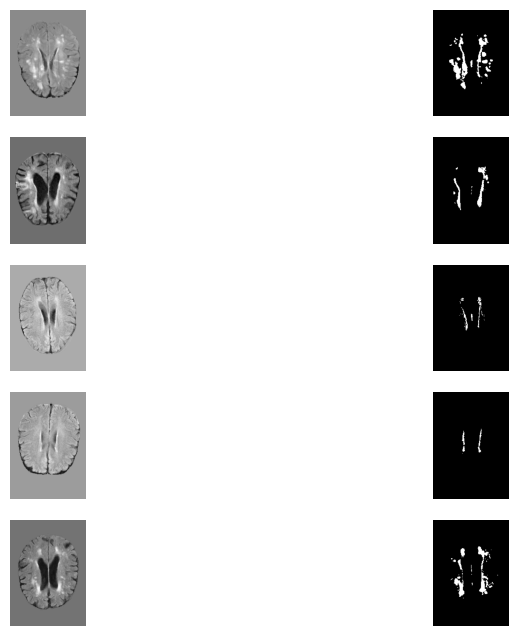

In [37]:
islice=25
def brainshow(slice_img):
    plt.imshow(slice_img, cmap='gray')
    plt.axis('off')

# plot the images from the in_ram samples
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.subplot(5, 2, i*2 + 1)
    brainshow(inram_samples[i][0][0][islice])
    plt.subplot(5, 2, i*2 + 2)
    brainshow(inram_samples[i][1][0][islice])

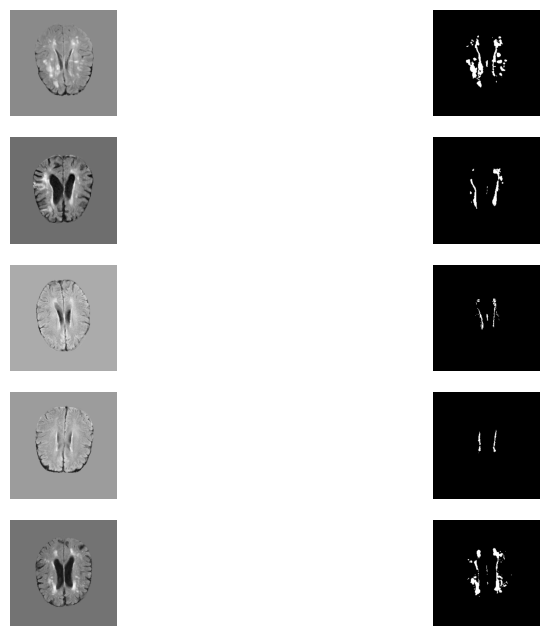

In [39]:
# plot the images from the in_ram samples
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.subplot(5, 2, i*2 + 1)
    brainshow(indisk_samples[i][0][0][islice])
    plt.subplot(5, 2, i*2 + 2)
    brainshow(indisk_samples[i][1][0][islice])

### Conclusion
Yes, success!
The images appear in their natural order for the in ram dataset, so we can match the clinScores table data to the in ram images by using the natural ordering found in the in_file dataset. Nice.

In [45]:
os.path.join("a", "b")

'a/b'

In [46]:
# now, writing some code that separates the table for each domain
def get_clinscores(imgs_dir, clinScores_filepath, domain):
    # get list of individuals (IDs) for that file
    files_ds = MRISegmentationDatasetFromFile(os.path.join(imgs_dir, domain), 
                 img_filetypes=["FLAIR_BET_mask.nii.gz", "FLAIR.nii.gz", "T1.nii.gz"], # brain mask, flair, T1.
                 label_filetype="wmh.nii.gz")
    individuals = in_disk_ds.individuals
    
    df = pd.read_csv(clinScores_filepath)
    filtered = df.loc[df['ID'].isin(individuals)]

    return filtered
    

In [47]:
filtered = df.loc[df['ID'].isin(individuals)]

In [50]:
#filtered.iloc[0]